In [1]:

from DNA import DNA
from Graficador import *
from Seleccion import Seleccion
import pandas as pd
from Cromosoma import Cromosoma

Generando un marco de datos

In [2]:

def generarDataFrame(pob_dec, pob_bin,info_obj,info_fitness):
    data = {'Decimales': pob_dec, 'Binarios': pob_bin, 'FuncionObjetivo':info_obj,"Fitness":info_fitness}
    dataFrame = pd.DataFrame(data)
    #display(dataFrame)
    return dataFrame



In [3]:
def generarEstadisticas(dataFrame):
    indice_cromosoma_max = dataFrame[dataFrame['FuncionObjetivo']==dataFrame['FuncionObjetivo'].max()].index.values[0]
    cromosoma_max = dataFrame['Binarios'][indice_cromosoma_max]
    stats = {'Suma':[ dataFrame['FuncionObjetivo'].sum(), dataFrame['Fitness'].sum() ],
                'Promedio': [ dataFrame['FuncionObjetivo'].mean(), dataFrame['Fitness'].mean() ],
                'Máximo': [ dataFrame['FuncionObjetivo'].max(), dataFrame['Fitness'].max() ], 
                'Mínimo': [ dataFrame['FuncionObjetivo'].min(), dataFrame['Fitness'].min() ]}
    dataFrame_stats = pd.DataFrame(stats, index = ['Función objetivo', 'Fitness'])
    #display(dataFrame_stats)
    return dataFrame_stats, stats, cromosoma_max
# marcoDeDatos_stats, stats, cromosoma_max = generarEstadisticas(data_frame)
# marcoDeDatos_stats

In [4]:
estadisticas = { "CromosomaMáximo":[],"Máximo":[], "Mínimo":[], "Promedio":[]}


In [5]:
def agregar_stats(stats,cromosoma_max):
    estadisticas["CromosomaMáximo"].append(cromosoma_max)
    estadisticas["Máximo"].append(stats['Máximo'][0])
    estadisticas["Mínimo"].append(stats['Mínimo'][0])
    estadisticas["Promedio"].append(stats['Promedio'][0])
    

In [6]:
def almacenar_informacion(DNA1):
    poblacion_info,info_decimal,info_fitness,info_objetivo = DNA1.get_info_poblacion()
    data_frame = generarDataFrame(info_decimal,poblacion_info,info_objetivo,info_fitness)
    data_frame_stats,stats,cromosoma_max = generarEstadisticas(data_frame)
    agregar_stats(stats,cromosoma_max)

In [7]:
def graficar_por_iteracion(res_objetivo,res_fitness,numero_ciclo,info_decimal,info_objetivo):
    pass
    # filas = []
    # encabezado = ['Poblacion(10)', 'Valor objetivo', 'Valor fitness']

    # fila_suma = ["Suma", res_objetivo["Suma"], res_fitness["Suma"]]
    # fila_promedio = ["Promedio", res_objetivo["Promedio"], res_fitness["Promedio"]]
    # fila_maximo = ["Maximo", res_objetivo["Maximo"], res_fitness["Maximo"]]

    
    # filas.extend(poblacion_info)
    # filas.extend([fila_suma,fila_maximo,fila_promedio]) 

    # numero_ciclo = str(numero_ciclo) if numero_ciclo > 9 else f'0{numero_ciclo}'

    # crearTabla(encabezado, filas) 
    # graph_to_png(f'Tabla_I{numero_ciclo}')

    # crearPieChart(encabezado,info_decimal)
    # graph_to_png(f'Torta-I{numero_ciclo}')
    # crearGraficoFuncion(funcion=funcion_objetivo,dominio=[0,2**30-1],puntos=[info_decimal,info_objetivo])
    # graph_to_png(f'Grafico-I{numero_ciclo}')

    # porcentaje_ocupado = list(map(lambda x: x/len(nueva_poblacion), [nueva_poblacion.count(cromosoma) for cromosoma in poblacion]))
    # crearPieChart(poblacion, porcentaje_ocupado)
    # graph_to_png(f'TortaRuleta-I{numero_ciclo}')
    # print(f'Poblacion seleccionada: {poblacion_seleccionada}')
    # print(f'Poblacion nueva: {nueva_poblacion}')

In [8]:
def ciclo(poblacion,fObjetivo,fFitness,numero_ciclo):
    DNA1 =  DNA(poblacion)
    elites = []
    res_objetivo = DNA1.calcular_objetivo(fObjetivo)
    res_fitness = DNA1.calcular_fitness(fFitness)

    almacenar_informacion(DNA1)
    # graficar_por_iteracion(res_objetivo,res_fitness)
    elites = Seleccion.elitismo(DNA1.poblacion,2) # NO ES UN METODO DE SELCCION
    cantidad = 10-len(elites)
    
    # cromosomas_padres = Seleccion.torneo(DNA1.poblacion,cantidad)
    cromosomas_padres = Seleccion.ruleta(DNA1.poblacion,vueltas=cantidad)
    cromosomas_hijos = DNA.cruzar_poblacion(cromosomas_padres)    

    if len(cromosomas_hijos)>0:
        nueva_poblacion = cromosomas_hijos + elites

    # print(len(nueva_poblacion))
    return nueva_poblacion


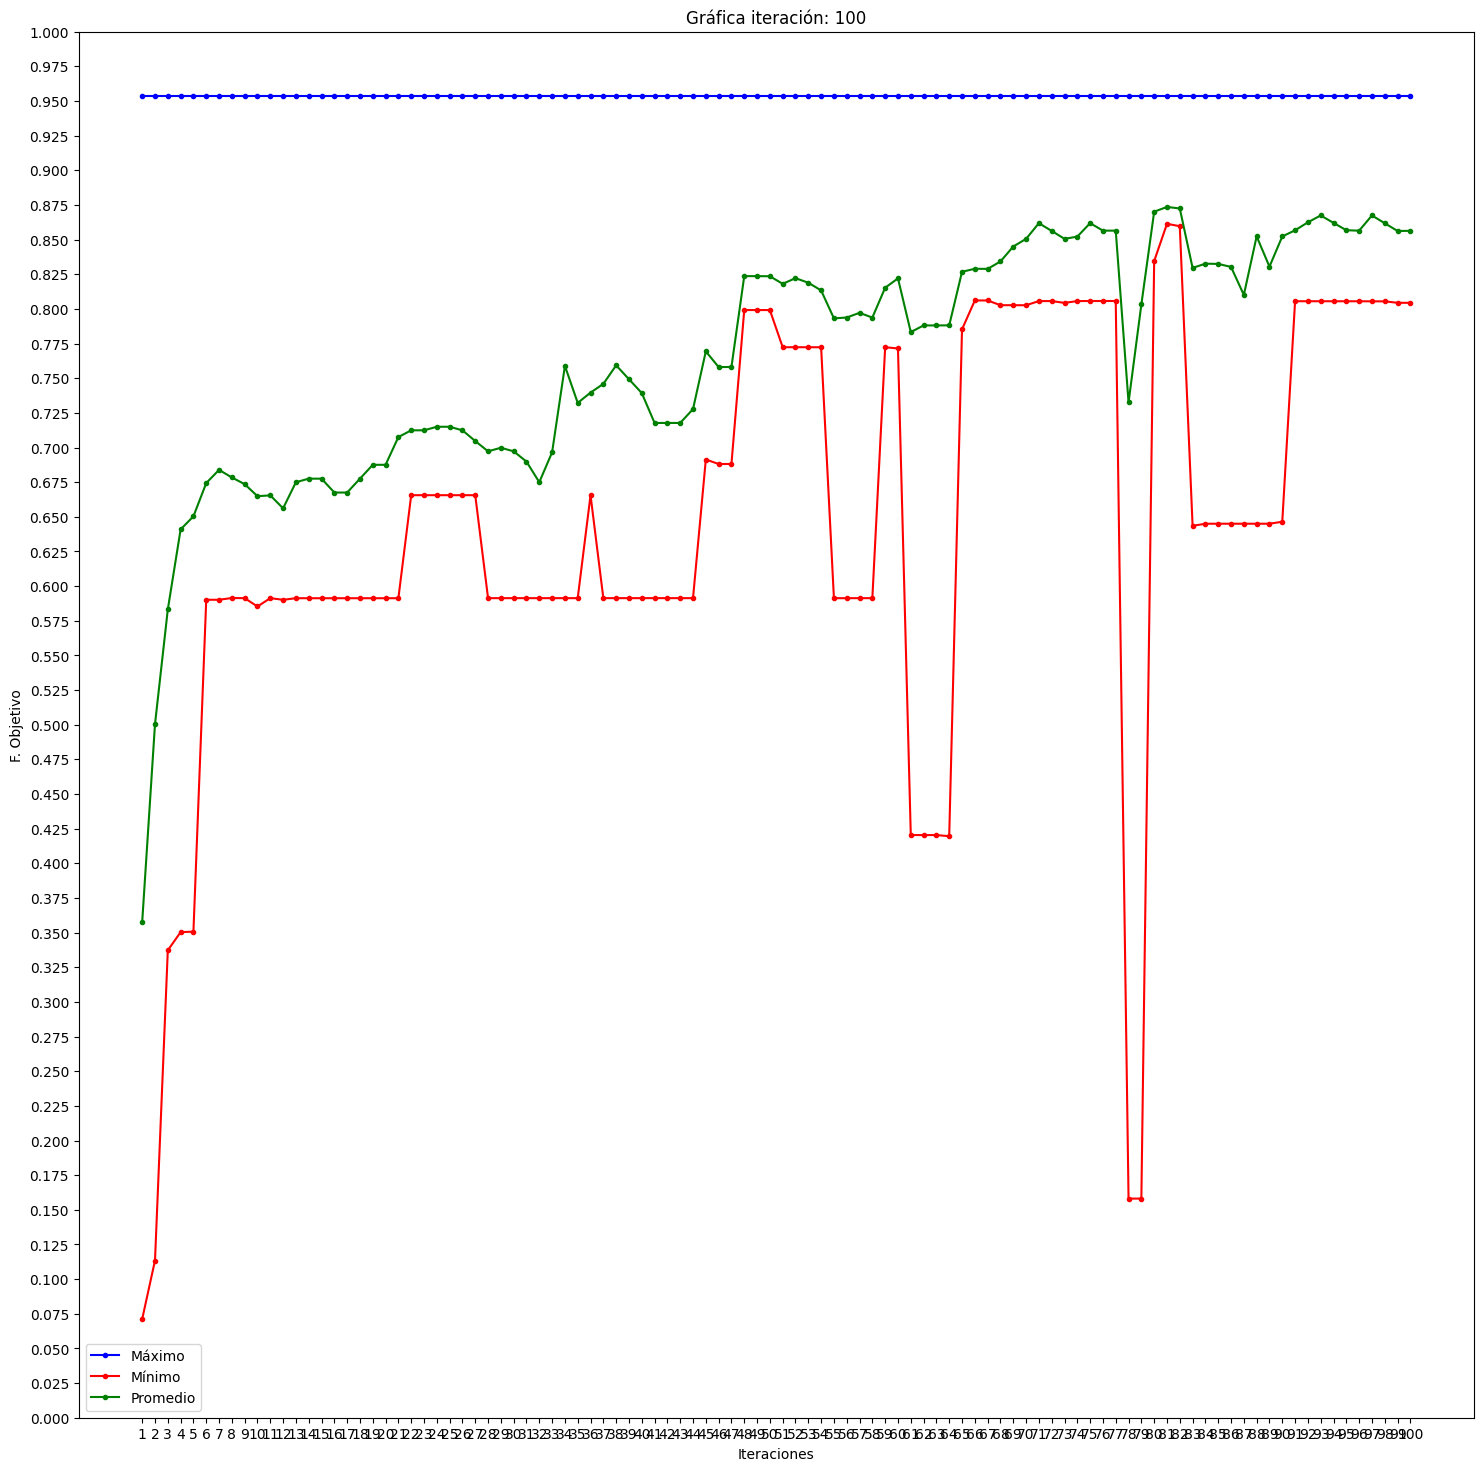

,Iteracion,CromosomaMax,Maximo,Minimo,Promedio
0,1,111110011111100001000000001011,0.953443,0.071164,0.357652
1,2,111110011111100001000000001011,0.953443,0.113418,0.500396
2,3,111110011111100001000000001011,0.953443,0.337234,0.583147
3,4,111110011111100001000000001011,0.953443,0.350336,0.640908
4,5,111110011111100001000000001011,0.953443,0.350719,0.650361
...,...,...,...,...,...
95,96,111110011111100001000000001011,0.953443,0.805524,0.856436
96,97,111110011111100001000000001011,0.953443,0.805469,0.867427
97,98,111110011111100001000000001011,0.953443,0.805469,0.861826
98,99,111110011111100001000000001011,0.953443,0.804408,0.856232


In [9]:
ciclos = 100
funcion_objetivo = lambda x: (x /( (2**30) -1 ))**2
fitness = lambda obj,sum_obj: obj/sum_obj
Cromosoma.setProbMutacion(0.05)
Cromosoma.setProbCrossover(0.75)
poblacion = DNA.generar_poblacion(10, 30)
# poblaciones = []

# poblaciones.append(poblacion)


for i in range(ciclos):
    nueva_poblacion = ciclo(poblacion,funcion_objetivo,fitness,i)
    poblacion = nueva_poblacion
    # poblaciones.append(poblacion)    
    # print(f'-----------{i}------------')
hacerGrafico(estadisticas, ciclos)
display(hacerTabla(estadisticas, ciclos))
